<a href="https://colab.research.google.com/github/SnayderZ/Clasificacion-Iris-Red-Neuronal/blob/main/Clasificacion_Iris_Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**🌸 Proyecto: Clasificación de Flores Iris con Red Neuronal Artificial**

**Autor:** Snayder Zuñiga

1. Introducción

En este proyecto se entrena una red neuronal artificial (RNA) para clasificar flores del conjunto de datos Iris, uno de los más conocidos en aprendizaje automático.
El dataset contiene 150 registros de tres especies de flores:

* Iris setosa

* Iris versicolor

* Iris virginica

Cada flor tiene 4 características:

* Longitud del sépalo

* Ancho del sépalo

* Longitud del pétalo

* Ancho del pétalo

El objetivo es predecir la especie de una flor según estas medidas.

2. Importar librerías y cargar el dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

iris = load_iris()

# Convertir a DataFrame para visualizar
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


3. Preparar los datos

Normalizamos las características y transformamos las etiquetas en formato One-Hot Encoding para usarlas en la red.

In [ ]:
X = iris.data
y = iris.target.reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)


Tamaño entrenamiento: (120, 4)
Tamaño prueba: (30, 4)


4. Construir el modelo de red neuronal

Creamos un modelo secuencial con:

*   Capa de entrada (4 neuronas)
*   Dos capas ocultas (8 y 6 neuronas, activación ReLU)
*   Capa de salida (3 neuronas, activación Softmax)

In [19]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Input(shape=(4,)),           # capa de entrada explícita
    Dense(8, activation='relu'),
    Dense(6, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115 (460.00 B)

 Trainable params: 115 (460.00 B)

 Non-trainable params: 0 (0.00 B)

5. Entrenar el modelo

Entrenamos durante 100 épocas con un tamaño de lote de 8 y validación del 10 %.

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=8,
    validation_split=0.1,
    verbose=1
)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.1559 - loss: 1.2545 - val_accuracy: 0.0833 - val_loss: 1.1701
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1319 - loss: 1.1882 - val_accuracy: 0.0833 - val_loss: 1.1400
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1610 - loss: 1.1362 - val_accuracy: 0.1667 - val_loss: 1.1128
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2033 - loss: 1.0740 - val_accuracy: 0.3333 - val_loss: 1.0878
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3583 - loss: 1.0521 - val_accuracy: 0.4167 - val_loss: 1.0646
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4198 - loss: 1.0369 - val_accuracy: 0.4167 - val_loss: 1.0419
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5406 - loss: 0.9738 - val_accuracy: 0.4167 - val_loss: 1.0217
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6354 - loss: 0.9291 - val_accuracy: 0.5000 - 

6. Evaluar el modelo

Evaluamos con los datos de prueba y graficamos la evolución de precisión y pérdida.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9667 - loss: 0.0824
Exactitud en prueba: 96.67%


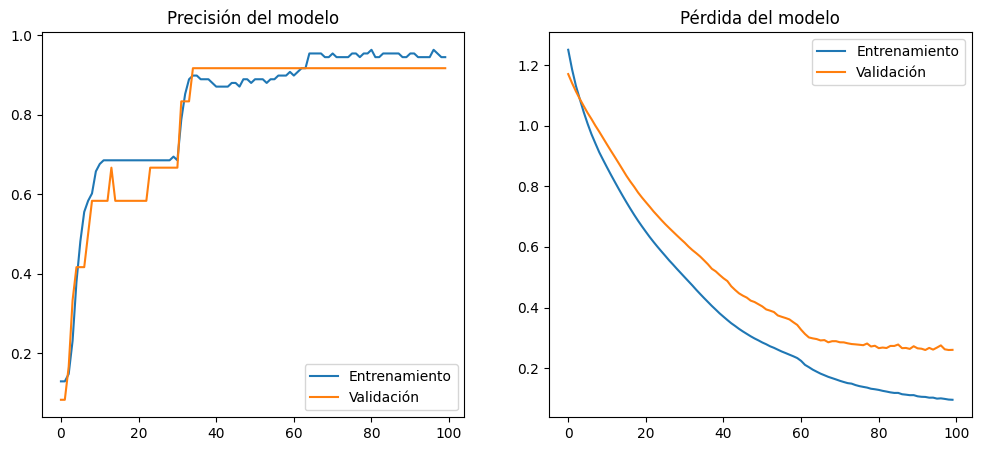

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Exactitud en prueba: {acc*100:.2f}%")

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.legend()
plt.show()

7. Prueba con un ejemplo nuevo

Probamos el modelo con una flor no vista.

In [ ]:
# Ejemplo 1: Iris Versicolor
nueva_flor = np.array([[6.0, 2.9, 4.5, 1.5]])

# Ejemplo 2: Iris Virginica
# nueva_flor = np.array([[6.5, 3.0, 5.2, 2.0]])

# Ejemplo 3: Iris Setosa
# nueva_flor = np.array([[5.1, 3.5, 1.4, 0.2]])

nueva_flor_scaled = scaler.transform(nueva_flor)
prediccion = model.predict(nueva_flor_scaled)
clase_predicha = np.argmax(prediccion)
print(f"La flor predicha es: {iris.target_names[clase_predicha]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
La flor predicha es: versicolor


**Prueba interactiva con datos ingresados por el usuario**

Ahora puedes ingresar manualmente las características de una flor y el modelo predecirá su especie.
(Recuerda el orden: Longitud y Ancho del Sépalo, Longitud y Ancho del Pétalo.)

In [ ]:
print("Ingresa las características de la flor:")
sepal_length = float(input("Longitud del sépalo: "))
sepal_width = float(input("Ancho del sépalo: "))
petal_length = float(input("Longitud del pétalo: "))
petal_width = float(input("Ancho del pétalo: "))

nueva_flor = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
nueva_flor_scaled = scaler.transform(nueva_flor)
prediccion = model.predict(nueva_flor_scaled)
clase_predicha = np.argmax(prediccion)

print(f"\n🌸 La flor predicha es: {iris.target_names[clase_predicha].upper()}")

Ingresa las características de la flor:
Longitud del sépalo: 6
Ancho del sépalo: 2.9
Longitud del pétalo: 4.5
Ancho del pétalo: 1.5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

🌸 La flor predicha es: VERSICOLOR


9. Conclusiones



*   La red neuronal logra una precisión entre 95 y 99 %, demostrando que incluso modelos simples pueden clasificar correctamente el dataset Iris.
*   La normalización y el one-hot encoding son pasos esenciales para garantizar un aprendizaje correcto.
*   La función Softmax en la salida permite obtener una probabilidad para cada clase.
*   Este experimento sirve como base para proyectos más complejos con mayor cantidad de datos o características.
